# Report
1) Imported Microsoft MSFT stock data from Quandl by using Quandl and also imported essential libraries
2) Saw the structure and shape of the dataset
3) Plotted moving averages of the MSFT for 30 days and 180 days on Adj_close value of the stock
4) Calculated volatality percentage which is ((Adj_High - Adj_close)/ Adj_close)* 100
5) Calculated % change in the stock which is ((Adj_close - Adj_open) / Adj_open )* 100
6) Made dataset available for running machine learning algorithm with label = close values
7) Scaled data using preprocessing.scaled
8) Used Linear regression and SVM classifier
9) Got 97.65% accuracy for linear regression and around 95% for SVM
10) Predicted close values with 97.65 % accuracy using Linear Regression
11) Plotted the graph of Adj_close vs Date and we can clearly see the forecast values of the stock in orange color

In [1]:
# importing libraries
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, cross_validation,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import time
import quandl
import warnings
warnings.filterwarnings('ignore')

C:\Users\Alok Sheth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
MSFT = quandl.get("EOD/MSFT", authtoken="MJfexYsoHp8ri3cF2_PP")
MSFT.shape

(8241, 12)

In [3]:
MSFT.info


<bound method DataFrame.info of                Open    High       Low   Close      Volume  Dividend  Split  \
Date                                                                         
1986-03-13   25.500   29.25   25.5000   28.00   3582600.0      0.00    1.0   
1986-03-14   28.000   29.50   28.0000   29.00   1070000.0      0.00    1.0   
1986-03-17   29.000   29.75   29.0000   29.50    462400.0      0.00    1.0   
1986-03-18   29.500   29.75   28.5000   28.75    235300.0      0.00    1.0   
1986-03-19   28.750   29.00   28.0000   28.25    166300.0      0.00    1.0   
1986-03-20   28.250   28.25   27.2500   27.50    202900.0      0.00    1.0   
1986-03-21   27.500   28.00   26.2500   26.75    208300.0      0.00    1.0   
1986-03-24   26.750   26.75   25.7500   26.00    226700.0      0.00    1.0   
1986-03-25   26.000   26.50   25.7500   26.50    111400.0      0.00    1.0   
1986-03-26   26.500   27.50   26.2500   27.25     79000.0      0.00    1.0   
1986-03-27   27.250   27.75   27

In [4]:
MSFT.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.057937,0.066457,0.057937,0.063617,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.063617,0.067025,0.063617,0.065889,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.065889,0.067593,0.065889,0.067025,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.067025,0.067593,0.064753,0.065321,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.065321,0.065889,0.063617,0.064185,4.789440e+07


In [5]:
MSFT = MSFT[['Adj_Open','High','Low','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]
MSFT.head()

,Adj_Open,High,Low,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,
1986-03-13,0.057937,29.25,25.5,0.066457,0.057937,0.063617,1.031789e+09
1986-03-14,0.063617,29.50,28.0,0.067025,0.063617,0.065889,3.081600e+08
1986-03-17,0.065889,29.75,29.0,0.067593,0.065889,0.067025,1.331712e+08
1986-03-18,0.067025,29.75,28.5,0.067593,0.064753,0.065321,6.776640e+07
1986-03-19,0.065321,29.00,28.0,0.065889,0.063617,0.064185,4.789440e+07


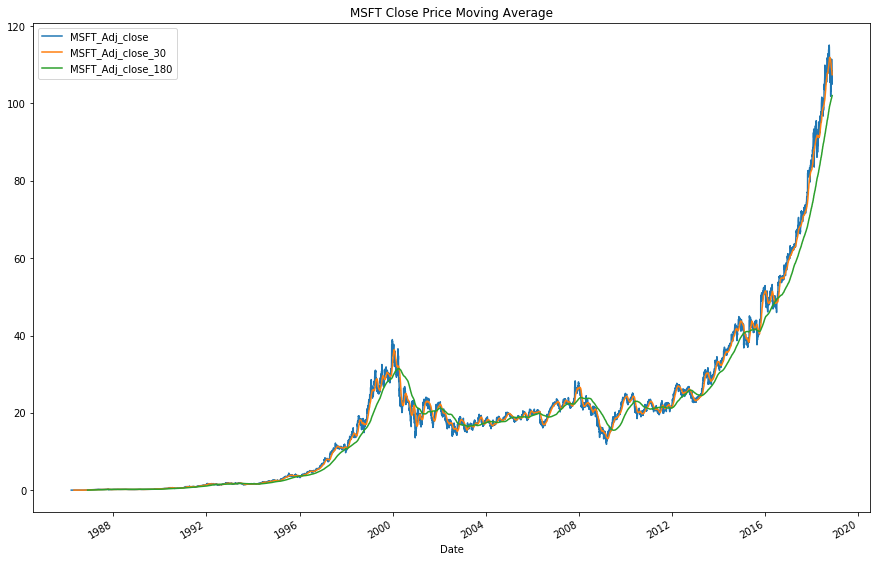

In [6]:
MSFT_close = MSFT['Adj_Close']

MSFT_close_30 = MSFT_close.rolling(window=30).mean()
MSFT_close_180 = MSFT_close.rolling(window=180).mean()

result_MSFT = pd.DataFrame({'MSFT_Adj_close':MSFT_close,
                      'MSFT_Adj_close_30':MSFT_close_30,
                      'MSFT_Adj_close_180':MSFT_close_180})

result_MSFT.plot(title="MSFT Close Price Moving Average")
plt.gcf().set_size_inches(15,10)


In [7]:
MSFT['Volatality_Percent'] = ((MSFT['Adj_High'] - MSFT['Adj_Close']) / MSFT['Adj_Close']) * 100
MSFT.head()

,Adj_Open,High,Low,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Volatality_Percent
Date,,,,,,,,
1986-03-13,0.057937,29.25,25.5,0.066457,0.057937,0.063617,1.031789e+09,4.464286
1986-03-14,0.063617,29.50,28.0,0.067025,0.063617,0.065889,3.081600e+08,1.724138
1986-03-17,0.065889,29.75,29.0,0.067593,0.065889,0.067025,1.331712e+08,0.847458
1986-03-18,0.067025,29.75,28.5,0.067593,0.064753,0.065321,6.776640e+07,3.478261
1986-03-19,0.065321,29.00,28.0,0.065889,0.063617,0.064185,4.789440e+07,2.654867


In [8]:
MSFT['Percent_Change'] = ((MSFT['Adj_Close'] - MSFT['Adj_Open']) / MSFT['Adj_Open']) * 100
MSFT.head()

,Adj_Open,High,Low,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Volatality_Percent,Percent_Change
Date,,,,,,,,,
1986-03-13,0.057937,29.25,25.5,0.066457,0.057937,0.063617,1.031789e+09,4.464286,9.803922
1986-03-14,0.063617,29.50,28.0,0.067025,0.063617,0.065889,3.081600e+08,1.724138,3.571429
1986-03-17,0.065889,29.75,29.0,0.067593,0.065889,0.067025,1.331712e+08,0.847458,1.724138
1986-03-18,0.067025,29.75,28.5,0.067593,0.064753,0.065321,6.776640e+07,3.478261,-2.542373
1986-03-19,0.065321,29.00,28.0,0.065889,0.063617,0.064185,4.789440e+07,2.654867,-1.739130


In [9]:
MSFT = MSFT[['Adj_Close','Volatality_Percent','Percent_Change','Adj_Volume']]
MSFT.head()

,Adj_Close,Volatality_Percent,Percent_Change,Adj_Volume
Date,,,,
1986-03-13,0.063617,4.464286,9.803922,1.031789e+09
1986-03-14,0.065889,1.724138,3.571429,3.081600e+08
1986-03-17,0.067025,0.847458,1.724138,1.331712e+08
1986-03-18,0.065321,3.478261,-2.542373,6.776640e+07
1986-03-19,0.064185,2.654867,-1.739130,4.789440e+07


In [10]:
forecast_col = MSFT['Adj_Close']
MSFT.fillna(-99999, inplace = True)
forecast_out = int(math.ceil(0.01* len(MSFT)))
MSFT['label'] = forecast_col.shift(-forecast_out)
MSFT.dropna(inplace = True)

In [11]:
MSFT.tail()

,Adj_Close,Volatality_Percent,Percent_Change,Adj_Volume,label
Date,,,,,
2018-07-17,105.077805,0.519113,1.280948,25901726.0,106.403717
2018-07-18,104.254637,0.884703,-0.774023,29493927.0,106.473412
2018-07-19,103.540565,0.871648,-0.505099,40171646.0,104.970000
2018-07-20,105.395170,1.816129,-1.674685,56038827.0,107.280000
2018-07-23,107.081176,0.157451,1.571025,29706955.0,108.290000


In [12]:
X = np.array(MSFT.drop(['label'],axis = 1))
y = np.array(MSFT['label'])

In [13]:
X = preprocessing.scale(X)
MSFT.dropna(inplace = True)
y = np.array(MSFT['label'])

In [14]:
print(len(X),len(y))

8158 8158


In [15]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)
Accuracy

0.9786806155085819

In [16]:
X_after = X[-forecast_out:]
forecast_set = clf.predict(X_after)
print(forecast_set)
print(Accuracy)
print(forecast_out)

[100.02405829  95.93637576  95.47408396  97.46425883  94.6049927
  95.73534923  98.69544751  98.69557731  96.51308947  97.19051578
  99.22881967  98.27527077 100.02320321  99.52556855 100.66290921
 102.67429026 103.06599015 102.7683903  101.52673477 101.95897833
  99.73411029  98.60712346 100.66288209 102.38239495 100.05284004
 101.48879832 100.01754923 100.5512172  101.71764721 102.85611091
 102.37464073 103.54115872 104.60693951 104.42626182 104.82888022
 104.01168798 104.28993298 103.38284031 103.4924996  104.80133762
 104.73682316 105.92095846 105.51332797 105.64036253 105.2214526
 106.22106458 106.09341002 108.14700877 109.0916208  109.66814569
 110.00099166 108.38272486 109.10640261 108.4778133  108.75975542
 108.28155613 108.87064864 107.2524018  108.26591836 108.22337571
 109.37476158 108.6592795  107.65833196 105.64347041 106.40509096
 104.84832421 105.88205681 105.91428437 107.38880412 106.49568865
 107.08943602 108.63506695 109.37448929 109.65370741 109.51456685
 111.8563815

In [17]:
clf = svm.SVR()
clf.fit(X_train, y_train)
Accuracy = clf.score(X_test, y_test)
Accuracy

0.9446021711409945

In [18]:
MSFT['Forecast'] = np.nan
last_date = MSFT.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [19]:
for i in forecast_set:
    next_date =  datetime.datetime.fromtimestamp(next_unix)
    next_unix = next_unix + one_day
    MSFT.loc[next_date] = [np.nan for __ in range (len(MSFT.columns) - 1)] + [i]
MSFT.tail()

,Adj_Close,Volatality_Percent,Percent_Change,Adj_Volume,label,Forecast
Date,,,,,,
2018-10-09 19:00:00,NaN,NaN,NaN,NaN,NaN,113.776986
2018-10-10 19:00:00,NaN,NaN,NaN,NaN,NaN,112.849717
2018-10-11 19:00:00,NaN,NaN,NaN,NaN,NaN,111.999183
2018-10-12 19:00:00,NaN,NaN,NaN,NaN,NaN,113.984261
2018-10-13 19:00:00,NaN,NaN,NaN,NaN,NaN,115.885996


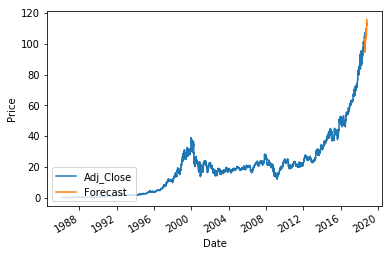

In [20]:
MSFT['Adj_Close'].plot()
MSFT['Forecast'].plot()
plt.legend(loc = 3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()